In [14]:
from __future__ import (absolute_import, division, print_function,
                        unicode_literals)

import datetime  # For datetime objects
import backtrader as bt

In [15]:
class Macd(bt.Strategy):
    def __init__(self):
        self.fast = bt.indicators.EMA(self.datas[0].close, period=12)
        self.slow = bt.indicators.EMA(self.datas[0].close, period=26)
        self.MACD = self.fast-self.slow
        self.signal = bt.indicators.EMA(self.MACD,period=9,plotname="Signal line")
        self.cross_over = bt.indicators.CrossOver(self.MACD,self.signal)
        
    def next(self):
        if(self.cross_over > 0):
            if(self.position.size==0):
                self.buy()
        elif(self.cross_over < 0):
            if(self.position.size > 0):
                self.sell()
        

In [16]:
class Rsi(bt.Strategy):
    def __init__(self):
        self.rsi=bt.indicators.RSI_EMA(self.datas[0].close,period=14)   
    def next(self):
        if(self.rsi < 30):
            if(self.position.size==0):
                self.buy()
        elif(self.rsi > 70):
            if(self.position.size > 0):
                self.sell()

In [11]:
class Gold(bt.strategy):    
    def __init__(self):
        self.fast = bt.indicators.EMA(self.datas[0].close, period=20)
        self.slow = bt.indicators.EMA(self.datas[0].close, period=50)
        self.cross_over = bt.indicators.CrossOver(self.fast,self.slow)  
        
    def next(self):
        if(self.cross==1):
            if(self.position.size==0):
                self.buy()
        elif(self.cross==-1):
            if(self.position.size > 0):
                self.sell()

TypeError: module() takes at most 2 arguments (3 given)

Starting Portfolio Value: 10000.00
Final Portfolio Value: 10472.00


<IPython.core.display.Javascript object>


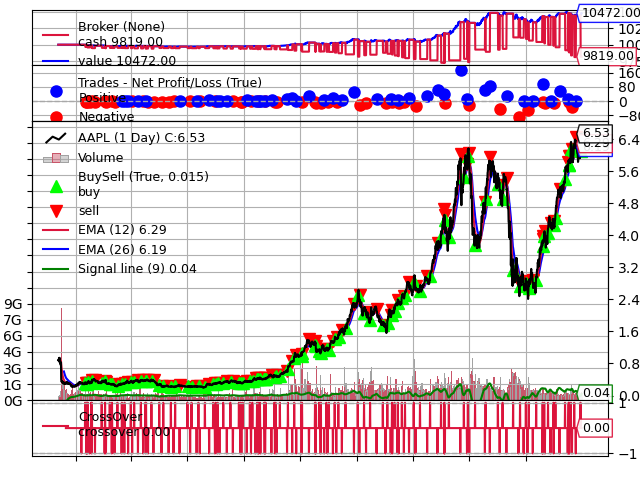

[[<Figure size 640x480 with 5 Axes>]]

In [12]:
cerebro=bt.Cerebro()
cerebro.addstrategy(Macd)
data = bt.feeds.YahooFinanceCSVData(
dataname="AAPL.csv",
        # Do not pass values before this date
fromdate=datetime.datetime(2000, 1, 1),
        # Do not pass values before this date
todate=datetime.datetime(2009, 12, 31),
        # Do not pass values after this date
reverse=False)

    # Add the Data Feed to Cerebro
cerebro.adddata(data)

    # Set our desired cash start
cerebro.broker.setcash(10000.0)

    # Add a FixedSize sizer according to the stake
cerebro.addsizer(bt.sizers.FixedSize, stake=100)

    # Set the commission
cerebro.broker.setcommission(commission=0.0)

    # Print out the starting conditions
print('Starting Portfolio Value: %.2f' % cerebro.broker.getvalue())

    # Run over everything
cerebro.run()

    # Print out the final result
print('Final Portfolio Value: %.2f' % cerebro.broker.getvalue())
cerebro.plot()

Starting Portfolio Value: 10000.00
Final Portfolio Value: 10063.00


<IPython.core.display.Javascript object>


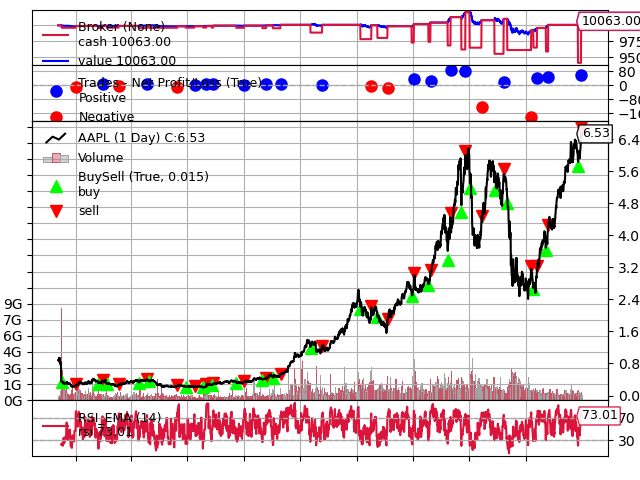

[[<Figure size 640x480 with 5 Axes>]]

In [17]:
cerebro=bt.Cerebro()
cerebro.addstrategy(Rsi)
data = bt.feeds.YahooFinanceCSVData(
dataname="AAPL.csv",
        # Do not pass values before this date
fromdate=datetime.datetime(2000, 1, 1),
        # Do not pass values before this date
todate=datetime.datetime(2009, 12, 31),
        # Do not pass values after this date
reverse=False)

    # Add the Data Feed to Cerebro
cerebro.adddata(data)

    # Set our desired cash start
cerebro.broker.setcash(10000.0)

    # Add a FixedSize sizer according to the stake
cerebro.addsizer(bt.sizers.FixedSize, stake=100)

    # Set the commission
cerebro.broker.setcommission(commission=0.0)

    # Print out the starting conditions
print('Starting Portfolio Value: %.2f' % cerebro.broker.getvalue())

    # Run over everything
cerebro.run()

    # Print out the final result
print('Final Portfolio Value: %.2f' % cerebro.broker.getvalue())
cerebro.plot()